<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            447 non-null    int64  
 1   listing_url                                   447 non-null    object 
 2   scrape_id                                     447 non-null    int64  
 3   last_scraped                                  447 non-null    object 
 4   source                                        447 non-null    object 
 5   name                                          447 non-null    object 
 6   description                                   437 non-null    object 
 7   neighborhood_overview                         198 non-null    object 
 8   picture_url                                   447 non-null    object 
 9   host_id                                       447 non-null    int

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


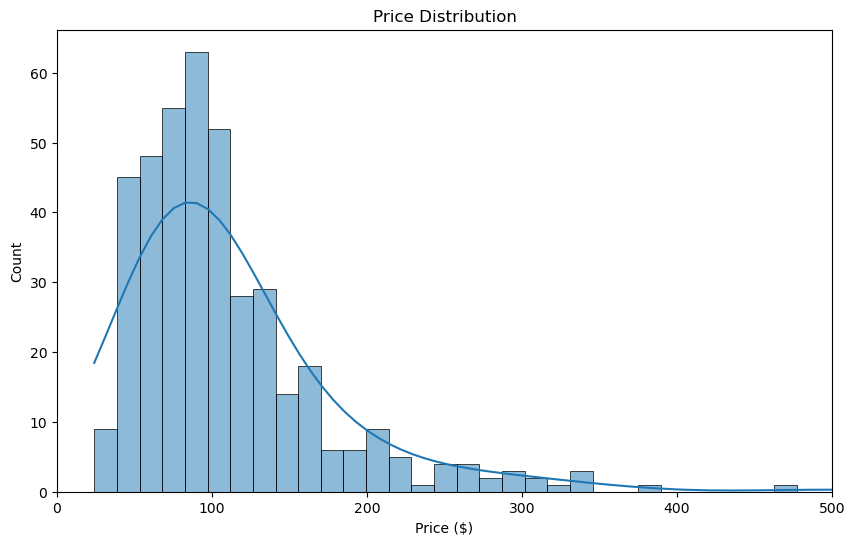

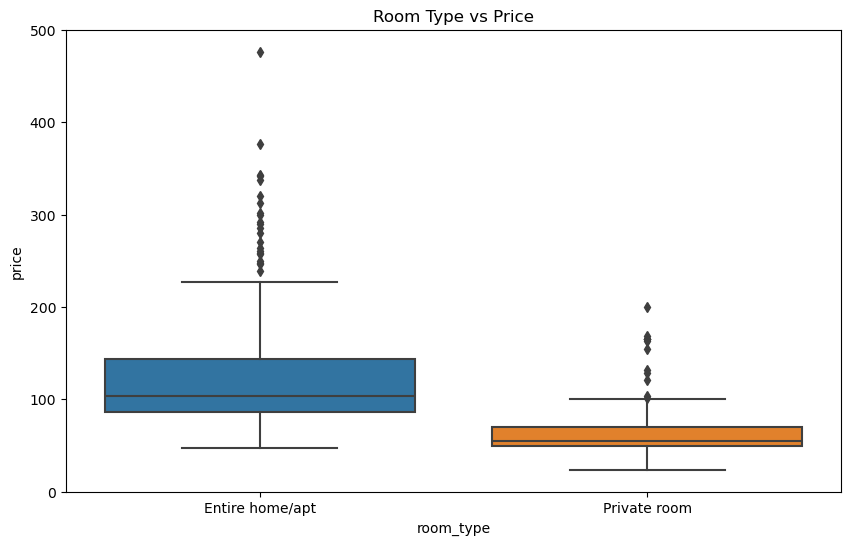

Mean Squared Error: 4013.01
R² Score: 0.67


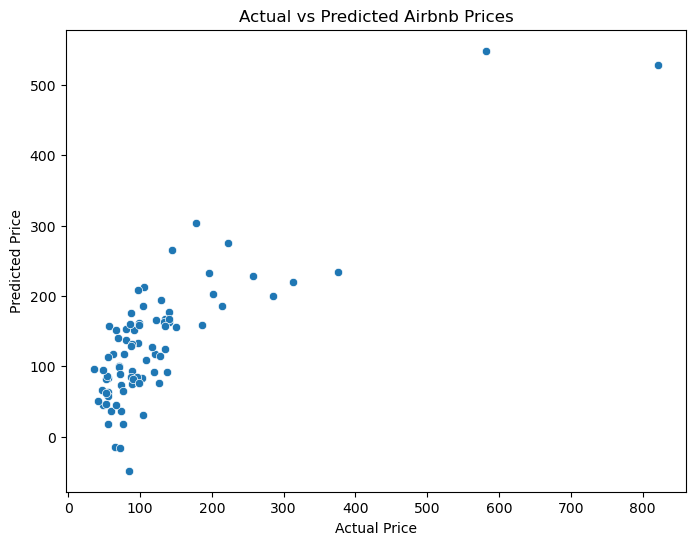

In [4]:
import pandas as pd

# Load data
df = pd.read_csv('listings.csv')

# Preview data
df.head()
df.info()
df.describe()

# Drop columns that are clearly irrelevant 
columns_to_drop = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
    'description', 'neighborhood_overview', 'picture_url', 'host_id',
    'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
    'host_response_time', 'host_response_rate', 'host_acceptance_rate',
    'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
    'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
    'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
    'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review',
    'license', 'instant_bookable', 'bathrooms_text', 'amenities',
    'calendar_last_scraped', 'estimated_revenue_l365d', 'listing_url',
    'number_of_reviews_ly', 'availability_eoy'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Remove $ and commas from price and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing values in reviews_per_month with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Drop rows where price or key number values are missing
df.dropna(subset=['price', 'minimum_nights', 'number_of_reviews', 'availability_365'], inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 500)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.show()

# Boxplot: Room Type vs Price
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 500)
plt.title("Room Type vs Price")
plt.show()

# Select features to keep
features = ['accommodates', 'bedrooms', 'beds', 'minimum_nights',
            'number_of_reviews', 'availability_365', 'reviews_per_month', 'room_type', 'price']

df = df[features].dropna()

# room_type
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop('price', axis=1)
y = df['price']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Airbnb Prices")
plt.show()















